In [53]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
from pathlib import Path
import seaborn as sns
from tqdm import tqdm

## Parsing files to arrays 

In [54]:
def read_content(xml_file):
    """
    formats data from xml to arrays.
    returns image name, boxes position, classes labels
    """
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    filename = root.find('filename').text

    
    if root.find('object') is None:
        list_with_all_boxes = [[None,None, None, None]]
        list_with_all_labels = [None]
    else:
        list_with_all_boxes = []
        list_with_all_labels = []
        for boxes in root.iter('object'):
            ymin, xmin, ymax, xmax = None, None, None, None

            ymin = int(boxes.find("bndbox/ymin").text)
            xmin = int(boxes.find("bndbox/xmin").text)
            ymax = int(boxes.find("bndbox/ymax").text)
            xmax = int(boxes.find("bndbox/xmax").text)

            list_with_single_boxes = [xmin, ymin, xmax, ymax]
            list_with_all_boxes.append(list_with_single_boxes)

            label = boxes.find("name").text
            list_with_all_labels.append(label)

    # add image width and height if needed
        
    return [filename]*len(list_with_all_labels), list_with_all_boxes, list_with_all_labels

## !! path = chemin du dossier des annotations

In [55]:
# path du dossier d'annotation
path = 'C:/Users/rajae/Downloads/animals-master/labelelled'
annotations_folder_path = Path(path)

In [56]:
# load the training data set (entirely or partly)
image_ids = np.array([])
box = np.empty((0,4))
label = np.array([])

for file in tqdm(list(annotations_folder_path.glob('*.xml'))):
    annot = read_content(file)
    image_ids = np.append(image_ids,annot[0])
    box = np.concatenate([box,annot[1]])
    label = np.append(label,annot[2])

100%|██████████████████████████████████████████████████████████████████████████████| 113/113 [00:00<00:00, 2137.91it/s]


In [57]:
# create the training dataframe
X = pd.DataFrame(image_ids,columns=['image_ids'])
# X = pd.DataFrame(box,columns=['xmin', 'ymin', 'xmax', 'ymax'])
X[['xmin', 'ymin', 'xmax', 'ymax']] = box
X['class']=label
X

,image_ids,xmin,ymin,xmax,ymax,class
0,img2000.jpg,2.0,1.0,63.0,63.0,orang-outan
1,img2004.jpg,14.0,3.0,64.0,64.0,lynx
2,img2006.jpg,1.0,4.0,61.0,64.0,guepard
3,img2008.jpg,1.0,16.0,64.0,64.0,loup
4,img2010.jpg,23.0,1.0,62.0,62.0,chimpanze
...,...,...,...,...,...,...
127,img2186.jpg,9.0,1.0,56.0,61.0,hamster
128,img2187.jpg,15.0,10.0,64.0,64.0,cochon-inde
129,img2188.jpg,1.0,7.0,64.0,56.0,cochon-inde
130,img2190.jpg,7.0,5.0,64.0,64.0,jaguar


<AxesSubplot:xlabel='class', ylabel='Count'>

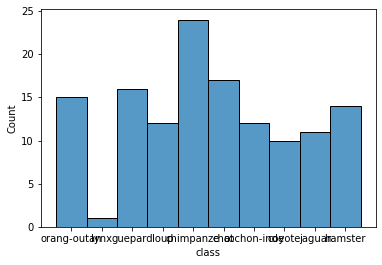

In [63]:
sns.histplot(X['class'])